In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.metrics import accuracy_score,confusion_matrix, log_loss

In [ ]:
train=pd.read_csv("train.csv",index_col=0)
test=pd.read_csv("test.csv",index_col=0)
submit=pd.read_csv("sample_submission.csv")

y=train['credit']
train=train.drop(axis=1, labels=['credit'])

test.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
index,,,,,,,,,,,,,,,,,,
26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [ ]:
# index 와 FLAG_MOBIL 제거
train = train.drop('FLAG_MOBIL',axis=1)
test=test.drop(axis=1,labels=['FLAG_MOBIL'])

In [ ]:
#문자로 된것들 라벨인코딩

train['gender'] = train['gender'].replace(['F','M'],[0,1])
test['gender'] = test['gender'].replace(['F','M'],[0,1])
print('gender :')
print(train['gender'].value_counts())
print('--------------')

print('Having a car or not : ')
train['car'] = train['car'].replace(['N','Y'],[0,1])
test['car'] = test['car'].replace(['N','Y'],[0,1])
print(train['car'].value_counts())
print('--------------')

print('Having house reality or not: ')
train['reality'] = train['reality'].replace(['N','Y'],[0,1])
test['reality'] = test['reality'].replace(['N','Y'],[0,1])
print(train['reality'].value_counts())
print('--------------')

print('edu_type')
train['edu_type'] = train['edu_type'].replace([ 'Academic degree','Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary'],[4,3,2,1,0])
test['edu_type'] = test['edu_type'].replace([ 'Academic degree','Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary'],[4,3,2,1,0])
print('--------------')

gender :
0    17697
1     8760
Name: gender, dtype: int64
--------------
Having a car or not : 
0    16410
1    10047
Name: car, dtype: int64
--------------
Having house reality or not: 
1    17830
0     8627
Name: reality, dtype: int64
--------------
edu_type
--------------


In [ ]:
# income total 전처리
train['income_total'] = train['income_total'].astype(object)
train['income_total'] = train['income_total']/10000 
test['income_total'] = test['income_total']/10000

In [ ]:
count, bin_dividers =np.histogram(train['income_total'], bins=7)
bin_names=['소득'+str(i) for i in range(7) ]
#bin_dividers는 train기준!!
train['income_total']=pd.cut(x=train['income_total'], bins=bin_dividers, labels=bin_names, include_lowest=True)
test['income_total']=pd.cut(x=test['income_total'], bins=bin_dividers, labels=bin_names, include_lowest=True)

In [ ]:
train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month
index,,,,,,,,,,,,,,,,,
0,0,0,0,0,소득0,Commercial associate,3,Married,Municipal apartment,-13899,-4709,0,0,0,NaN,2.0,-6.0
1,0,0,1,1,소득0,Commercial associate,2,Civil marriage,House / apartment,-11380,-1540,0,0,1,Laborers,3.0,-5.0
2,1,1,1,0,소득1,Working,3,Married,House / apartment,-19087,-4434,0,1,0,Managers,2.0,-22.0
3,0,0,1,0,소득0,Commercial associate,2,Married,House / apartment,-15088,-2092,0,1,0,Sales staff,2.0,-37.0
4,0,1,1,0,소득0,State servant,3,Married,House / apartment,-15037,-2105,0,0,0,Managers,2.0,-26.0


In [ ]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
train['income_type']=label_encoder.fit_transform(train['income_type'])
test['income_type']=label_encoder.transform(test['income_type'])
########################################################################
train['family_type']=label_encoder.fit_transform(train['family_type'])
test['family_type']=label_encoder.transform(test['family_type'])
########################################################################
train['house_type']=label_encoder.fit_transform(train['house_type'])
test['house_type']=label_encoder.transform(test['house_type'])
########################################################################
train['income_total']=label_encoder.fit_transform(train['income_total'])
test['income_total']=label_encoder.fit_transform(test['income_total'])

In [ ]:
print(len(train['occyp_type'].unique()))

train['occyp_type']=train['occyp_type'].fillna('None')
test['occyp_type']=test['occyp_type'].fillna('None')
train['occyp_type'] = train['occyp_type'].replace(['None', 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
test['occyp_type'] = test['occyp_type'].replace(['None', 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])

19


#구간화

In [ ]:
#minus 변경하고
#구간화 함수
def make_bin(variable, n):
    train[variable]=-train[variable]
    test[variable]=-test[variable]
    count, bin_dividers =np.histogram(train[variable], bins=n) #train의 구간화를 적용
    bin_names=[str(i) for i in range(n)]
    train[variable]=pd.cut(x=train[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
    test[variable]=pd.cut(x=test[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
    test[variable].fillna(str(0), inplace=True) #test에는 없는 것을 임의의 값으로 채움
    ##########################################################
    train[variable]=label_encoder.fit_transform(train[variable])
    test[variable]=label_encoder.transform(test[variable])

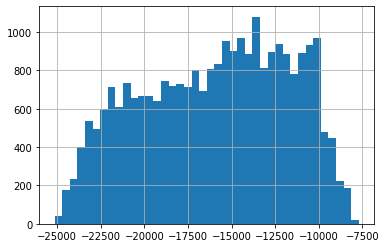

In [ ]:
train['DAYS_BIRTH'].hist(bins=40)

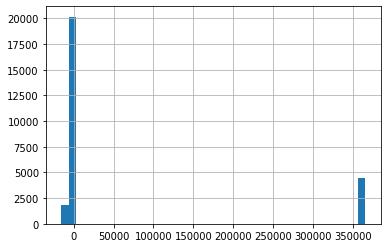

In [ ]:
train['DAYS_EMPLOYED'].hist(bins=40)

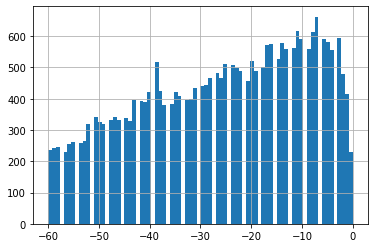

In [ ]:
train['begin_month'].hist(bins=80)

##DAYS_BIRTH,DAYS_EMPLOYED,begin_month

In [ ]:
make_bin('DAYS_BIRTH', n=10)
make_bin('DAYS_EMPLOYED', n=500)
make_bin('begin_month', n=4)
#count_values해보기

In [ ]:
train['DAYS_BIRTH'].value_counts()

3    3748
2    3498
4    3497
1    3271
5    2941
6    2773
7    2665
8    2340
0     876
9     848
Name: DAYS_BIRTH, dtype: int64

In [ ]:
train['DAYS_EMPLOYED'].value_counts()

2     4484
0     4438
3     3940
4     3036
1     2668
5     2428
6     1500
7     1003
8      894
10     424
9      392
11     372
12     231
13     188
14     149
15     102
17      67
16      55
18      33
20      25
21      20
19       8
Name: DAYS_EMPLOYED, dtype: int64

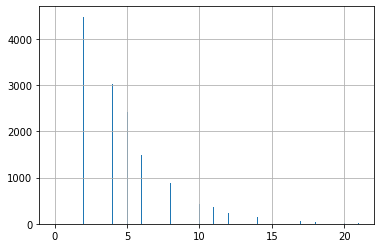

In [ ]:
train['DAYS_EMPLOYED'].hist(bins=500)

In [ ]:
train['begin_month'].value_counts()

0    8712
1    7418
2    6025
3    4302
Name: begin_month, dtype: int64

In [ ]:
train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month
index,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,3,1,2,3,1,0,0,0,0,2.0,0
1,0,0,1,1,0,0,2,0,1,2,1,0,0,1,1,3.0,0
2,1,1,1,0,1,4,3,1,1,6,1,0,1,0,2,2.0,1
3,0,0,1,0,0,0,2,1,1,4,1,0,1,0,3,2.0,2
4,0,1,1,0,0,2,3,1,1,4,1,0,0,0,2,2.0,1


##Child num

In [ ]:
for i in range(len(train['child_num'])):
    if train['child_num'][i]>5:
            train['child_num'][i]=6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
train['child_num'].value_counts()

0    18340
1     5386
2     2362
3      306
4       47
5       10
6        6
Name: child_num, dtype: int64

##Family size

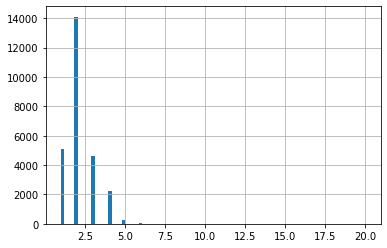

In [ ]:
train['family_size'].hist(bins=90)

In [ ]:
train['family_size'].value_counts()

2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64

In [ ]:
for i in range(len(train['family_size'])):
    if train['family_size'][i]>5:
            train['family_size'][i]=6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#Oversampling

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26457 entries, 0 to 26456
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  int64  
 1   car            26457 non-null  int64  
 2   reality        26457 non-null  int64  
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  int64  
 5   income_type    26457 non-null  int64  
 6   edu_type       26457 non-null  int64  
 7   family_type    26457 non-null  int64  
 8   house_type     26457 non-null  int64  
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  work_phone     26457 non-null  int64  
 12  phone          26457 non-null  int64  
 13  email          26457 non-null  int64  
 14  occyp_type     26457 non-null  int64  
 15  family_size    26457 non-null  float64
 16  begin_month    26457 non-null  int64  
dtypes: float64(1), int64(16)
memory usage: 4.9 MB


In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
sm= SMOTE(random_state=42)
train_sm,y_sm=sm.fit_resample(train,y)

syn=ADASYN(random_state=42)
train_syn,y_syn=syn.fit_resample(train,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
train_labels=['gender','car','reality','child_num','income_total','income_type','edu_type','family_type','house_type','DAYS_BIRTH','DAYS_EMPLOYED','work_phone','phone','email','occyp_type','family_size','begin_month']
train_sm=pd.DataFrame(train_sm, columns=train_labels)
train_syn=pd.DataFrame(train_syn, columns=train_labels)
pd.DataFrame(train_sm).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50904 entries, 0 to 50903
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         50904 non-null  float64
 1   car            50904 non-null  float64
 2   reality        50904 non-null  float64
 3   child_num      50904 non-null  float64
 4   income_total   50904 non-null  float64
 5   income_type    50904 non-null  float64
 6   edu_type       50904 non-null  float64
 7   family_type    50904 non-null  float64
 8   house_type     50904 non-null  float64
 9   DAYS_BIRTH     50904 non-null  float64
 10  DAYS_EMPLOYED  50904 non-null  float64
 11  work_phone     50904 non-null  float64
 12  phone          50904 non-null  float64
 13  email          50904 non-null  float64
 14  occyp_type     50904 non-null  float64
 15  family_size    50904 non-null  float64
 16  begin_month    50904 non-null  float64
dtypes: float64(17)
memory usage: 6.6 MB


In [ ]:
train_syn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50986 entries, 0 to 50985
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         50986 non-null  float64
 1   car            50986 non-null  float64
 2   reality        50986 non-null  float64
 3   child_num      50986 non-null  float64
 4   income_total   50986 non-null  float64
 5   income_type    50986 non-null  float64
 6   edu_type       50986 non-null  float64
 7   family_type    50986 non-null  float64
 8   house_type     50986 non-null  float64
 9   DAYS_BIRTH     50986 non-null  float64
 10  DAYS_EMPLOYED  50986 non-null  float64
 11  work_phone     50986 non-null  float64
 12  phone          50986 non-null  float64
 13  email          50986 non-null  float64
 14  occyp_type     50986 non-null  float64
 15  family_size    50986 non-null  float64
 16  begin_month    50986 non-null  float64
dtypes: float64(17)
memory usage: 6.6 MB


#성능 TEST

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x_train,x_valid,y_train,y_valid=train_test_split(train_syn,y_syn,test_size=0.15,stratify=y_syn)
xgb_classifier=xgb.XGBClassifier()
xgb_classifier.fit(x_train,y_train)

y_train_pred = xgb_classifier.predict(x_train)
y_valid_pred= xgb_classifier.predict(x_valid)

In [ ]:
rmse_train =np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_valid = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
print('RMSE train %0.3f, valid: %0.3f' %(rmse_train, rmse_valid))

RMSE train 0.796, valid: 0.809


In [ ]:
#sm:RMSE train 0.815, valid: 0.829
#syn:RMSE train 0.804, valid: 0.806

In [ ]:
xgb_classifier.fit(train_syn,y_syn)
y_test_pred_proba = xgb_classifier.predict_proba(test)
y_test_pred_proba

array([[0.17125708, 0.20048837, 0.62825453],
       [0.24460556, 0.25056982, 0.50482464],
       [0.25173566, 0.24340905, 0.5048553 ],
       ...,
       [0.12289593, 0.22930925, 0.64779484],
       [0.20107208, 0.20364651, 0.5952814 ],
       [0.22035557, 0.4004953 , 0.37914917]], dtype=float32)

In [ ]:
submit.iloc[:,1:]=y_test_pred_proba
submit.head()
submit.to_csv("submission_ver2_xgBoost_ADASYN.csv", index = False)

#One hot encoding

In [ ]:
train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month
index,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,3,1,2,3,1,0,0,0,0,2.0,0
1,0,0,1,1,0,0,2,0,1,2,1,0,0,1,1,3.0,0
2,1,1,1,0,1,4,3,1,1,6,1,0,1,0,2,2.0,1
3,0,0,1,0,0,0,2,1,1,4,1,0,1,0,3,2.0,2
4,0,1,1,0,0,2,3,1,1,4,1,0,0,0,2,2.0,1


In [ ]:
print("gender",len(train['gender'].unique()),train['gender'].unique())
print("car",len(train['car'].unique()),train['car'].unique())
print("reality",len(train['reality'].unique()),train['reality'].unique())
print("income_type",len(train['income_type'].unique()),train['income_type'].unique())
print("edu_type",len(train['edu_type'].unique()),train['edu_type'].unique())
print("family_type",len(train['family_type'].unique()),train['family_type'].unique())
print("house_type",len(train['house_type'].unique()),train['house_type'].unique())
print("work_phone",len(train['work_phone'].unique()),train['work_phone'].unique())
print("email",len(train['email'].unique()),train['email'].unique())
print("occyp_type",len(train['occyp_type'].unique()),train['occyp_type'].unique())
print("family_size",len(train['family_size'].unique()),train['family_size'].unique())
print("begin_month",len(train['begin_month'].unique()),train['begin_month'].unique())

gender 2 [0 1]
car 2 [0 1]
reality 2 [0 1]
income_type 5 [0 4 2 1 3]
edu_type 5 [3 2 1 0 4]
family_type 5 [1 0 2 3 4]
house_type 6 [2 1 5 0 4 3]
work_phone 2 [0 1]
email 2 [0 1]
occyp_type 19 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
family_size 6 [2. 3. 4. 1. 5. 6.]
begin_month 4 [0 1 2 3]


In [ ]:
train=pd.get_dummies(train,columns=['income_type','family_type','house_type','occyp_type'])
print(train.shape)
train.head()

(26457, 48)


,gender,car,reality,child_num,income_total,edu_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,income_type_0,income_type_1,income_type_2,income_type_3,income_type_4,family_type_0,family_type_1,family_type_2,family_type_3,family_type_4,house_type_0,house_type_1,house_type_2,house_type_3,house_type_4,house_type_5,occyp_type_0,occyp_type_1,occyp_type_2,occyp_type_3,occyp_type_4,occyp_type_5,occyp_type_6,occyp_type_7,occyp_type_8,occyp_type_9,occyp_type_10,occyp_type_11,occyp_type_12,occyp_type_13,occyp_type_14,occyp_type_15,occyp_type_16,occyp_type_17,occyp_type_18
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,3,3,1,0,0,0,2.0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,2,2,1,0,0,1,3.0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,1,3,6,1,0,1,0,2.0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,2,4,1,0,1,0,2.0,2,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,3,4,1,0,0,0,2.0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.head()

,gender,car,reality,child_num,income_total,edu_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,income_type_0,income_type_1,income_type_2,income_type_3,income_type_4,family_type_0,family_type_1,family_type_2,family_type_3,family_type_4,house_type_0,house_type_1,house_type_2,house_type_3,house_type_4,house_type_5,occyp_type_0,occyp_type_1,occyp_type_2,occyp_type_3,occyp_type_4,occyp_type_5,occyp_type_6,occyp_type_7,occyp_type_8,occyp_type_9,occyp_type_10,occyp_type_11,occyp_type_12,occyp_type_13,occyp_type_14,occyp_type_15,occyp_type_16,occyp_type_17,occyp_type_18
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,3,3,1,0,0,0,2.0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,2,2,1,0,0,1,3.0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,1,3,6,1,0,1,0,2.0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,2,4,1,0,1,0,2.0,2,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,3,4,1,0,0,0,2.0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
